In [2]:
#!/usr/bin/env python 
# -*- coding:utf-8 -*-
from collections import Counter
import pandas as pd
import matplotlib
%matplotlib inline

In [3]:
# 训练集
train_file = 'data/train.csv'
train_df = pd.read_csv(train_file, encoding='utf-8', header=0, sep='\t')  # 分隔符可能需要换

In [23]:
train_df.head()

,qid,label,question1,question2,len1,len2
0,1074,1,羁押的期限是多久？,羁押期是多少天？,9,8
1,41722,1,未婚先孕是不是违法行为,没领证怀孕了，要付法律责任吗,11,14
2,6196,0,无效婚姻犯法吗？,法律对无效婚姻的定罪是什么？,8,14
3,1632,0,故意遮挡，污损机动车号牌怎么处罚,故意遮挡、污损或不按规定安装机动车号牌的处多少罚款,16,25
4,35779,0,咨询一下现在闯红灯需要扣多少分呢,请问醉驾致人伤残应该怎么处理呢?,16,16


In [4]:
# 增加长度信息
train_df['len1'] = train_df['question1'].apply(lambda x: len(str(x)))
train_df['len2'] = train_df['question2'].apply(lambda x: len(str(x)))

Counter({0: 26009, 1: 19228})


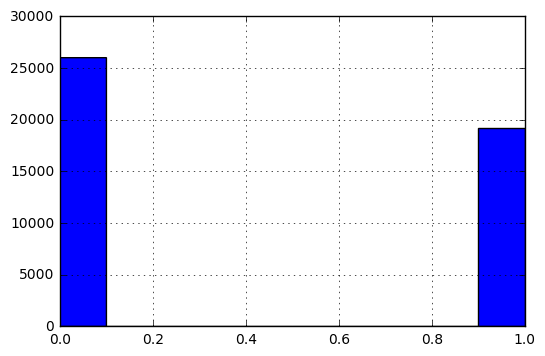

In [5]:
# 标签比例
train_df['label'].hist()
attr_name = 'label'
print(Counter(train_df[attr_name]))

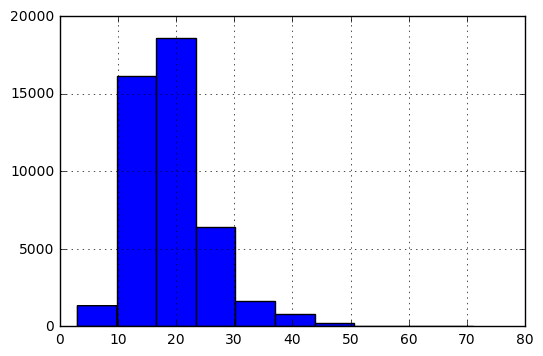

In [18]:
attr_name = 'len1'
# print(Counter(train_df[attr_name]))  # 统计某属性中各种类别的数量，但没有排序
# print(train_df[attr_name].value_counts())  # 经过了排序
train_df[attr_name].hist()

In [29]:
# 查看问题长度超过45的内容
question1_length_more150_df = train_df[train_df['question1'].apply(lambda x: len(str(x))>45)]
print(question1_length_more150_df.shape[0])
for index, row in question1_length_more150_df.iterrows():
    print(row['question1'])
    print(row['question2'])
    print(row['label'])
    print('\n')

218
分期付款的买卖合同中，因买受人未支付到期价款出卖人解除婚约的，买受人是否应支付标的物的使用费？
分期付款购物，出卖人能否要求解除合同并返还货物？
0


社会团体或者其他组织、个人在关系消费者生命健康商品或者服务的虚假广告或者其他虚假宣传中向消费者推荐商品或者服务，造成消费者损害的，是否承担责任
在关系消费者身体健康的商品和服务的虚假广告中做宣传或推销的社会团体、组织和个人，在成消费者损害后，是否要承担相应的法律责任
1


因药品、消毒药剂、医疗器械的缺陷，或者输入不合格的血液造成患者损害的，患者可以向谁主张赔偿权利？
因医疗用品或输入不合格的血液造成患者损害的，患者可以向谁主张赔偿权利？
1


关于双方对夫妻共同财产中的房屋价值及归属无法达成协议时，双方均主张房屋所有权的情况要怎么解决
对夫妻共同财产中的房屋价值及归属无法达成协议时，双方都想要房子的该如何处理
1


房东把房子出租给我了，但是在租赁期间他又把房子转卖给别人了，请问我的租赁合同会不会因此而被解除？
房屋的承租人在出租房内容留未成年吸毒的，房屋的出租者要不要承担法律责任？
0


借贷纠纷中，出借人以与借款人约定的其他方式提供借款但实际并未履行完成时，自然人之间的借款合同是否生效，
国家法律对个人借款事项有哪些规定
0


当事人持有的借据、收据、欠条等债权凭证没有载明债权人，持有债权凭证的当事人提起民间借贷诉讼的，人民法院是否受理
对方持有我的借据、收据、欠条等债权凭证没有载明债权人提起民间借贷诉讼的，人民法院会受理吗
1


遇到生产经营条件发生变化的情况，对于哪些不再符合食品安全要求的，食品生产经营者要采取什么措施来处理？
生产经营条件发生变化，不再符合食品安全要求的，食品生产经营者应当采取什么措施
1


离婚案件，分割夫妻共同财产中以一方名义在有限责任公司的出资额，另一方不是该公司股东的会分到吗
离婚案件，涉及分割夫妻共同财产中以一方名义在有限责任公司的出资额，另一方不是该公司股东的如何处理
1


企业法定代表人与出借人签订民间借贷合同的，哪些情形下出借人可以请求人民法院将企业法定代表人列为共同被告或者第三人
我们工厂的老板与出借人签订民间借贷合同的，哪些情形下出借人可以请求人民法院将老板列为共同被告
1


消费者人格尊严、人身自由或者个人信息的合法权利受到经营者侵害时，可

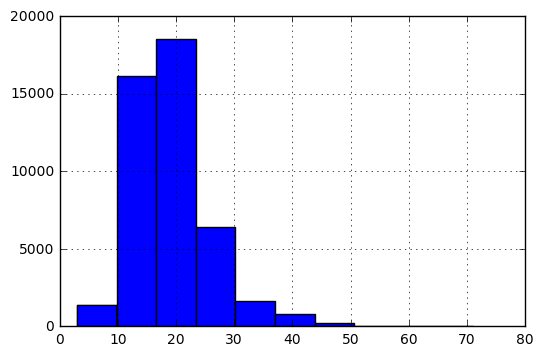

In [19]:
attr_name = 'len2'
# print(Counter(train_df[attr_name]))
# print(train_df[attr_name].value_counts())
train_df[attr_name].hist()

In [21]:
print(train_df['len1'].describe())  # 统计出现次数，数值范围
print(train_df['len2'].describe())

count    45237.000000
mean        19.089219
std          6.728765
min          3.000000
25%         15.000000
50%         18.000000
75%         22.000000
max         71.000000
Name: len1, dtype: float64
count    45237.000000
mean        19.092712
std          6.733451
min          3.000000
25%         15.000000
50%         18.000000
75%         22.000000
max         71.000000
Name: len2, dtype: float64


In [9]:
# 其它信息
# titanic.isnull().sum()
# print (titanic['Sex'].unique())  #统计有哪些类别
# train.info()  #展示数据结构信息 ，train为一dataframe
# count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
# df['colname'].value_counts()

In [11]:
# 训练集
test_file = 'data/dev_set.csv'
test_df = pd.read_csv(test_file, encoding='utf-8', header=0, sep='\t')  # 分隔符可能需要换

In [22]:
test_df.head()

,qid,question1,question2,len1,len2
0,0,生父母要求解除收养关系 养父母可主张经济补偿吗？,养父母起诉解除收养关系，可以要回抚养费吗,24,20
1,1,行政机关强行解除行政协议造成损失，如何索取赔偿？,行政机关使用或者损毁扣押的财物，应当承担什么法律责任,24,26
2,2,律师查阅案卷材料如何处理？,律师如何去法院调取案卷材料,13,13
3,3,出卖人一物多卖，买受人不能按照合同约定取得标的物所有权的，买受人是否可以追究出卖人违约责任,出卖人一物多卖，买受人不能按照合同约定取得标的物所有权的，买受人是否可以主张出卖人支付违约金,45,46
4,4,我和女朋友没结婚就同居，犯法吗,在没领证的情况下同居犯法吗,15,13


In [12]:
# 增加长度信息
test_df['len1'] = test_df['question1'].apply(lambda x: len(str(x)))
test_df['len2'] = test_df['question2'].apply(lambda x: len(str(x)))

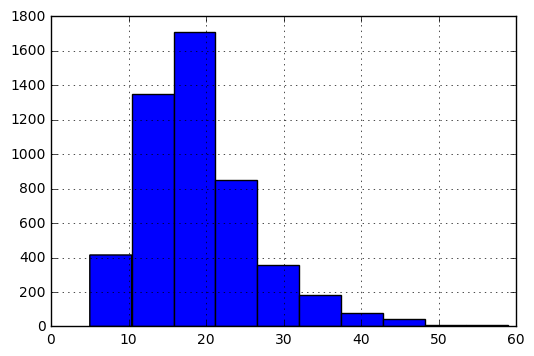

In [17]:
attr_name = 'len1'
# print(test_df[attr_name].value_counts())
test_df[attr_name].hist()

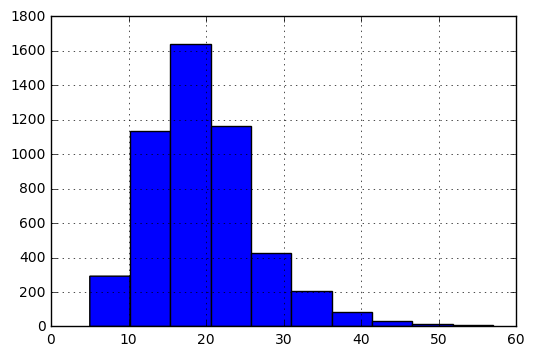

In [16]:
attr_name = 'len2'
# print(test_df[attr_name].value_counts())
test_df[attr_name].hist()

In [3]:
# 看预测文件中标签比例，从而决定构造数据的01比例，同时调整阈值
import pandas as pd
# 0.895
test_label_df = pd.read_csv('data/k5_epoch5_lr1_ml64_bs12.csv',sep='\t',encoding='utf-8',header=None)
test_label_df.head()

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


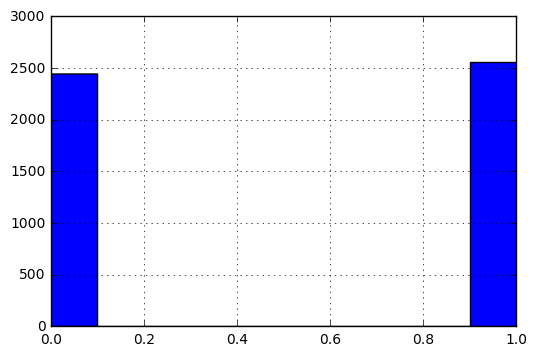

In [7]:
test_label_df[1].hist()

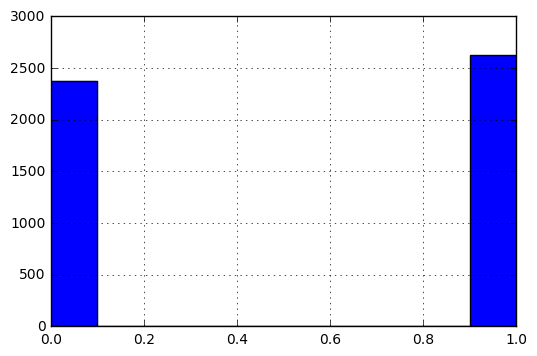

In [8]:
# 0.8878
test_label_df = pd.read_csv('robert_wwm_large_epoch5_lr1_ml64_bs12.csv',sep='\t',encoding='utf-8',header=None)
test_label_df.head()
test_label_df[1].hist()

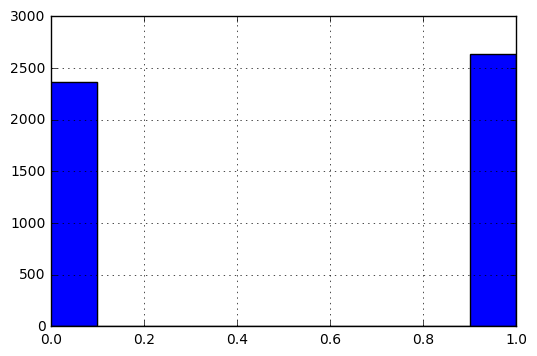

In [9]:
# 0.8702
test_label_df = pd.read_csv('robert_large_epoch9_lr1_ml48_bs16.csv',sep='\t',encoding='utf-8',header=None)
test_label_df.head()
test_label_df[1].hist()

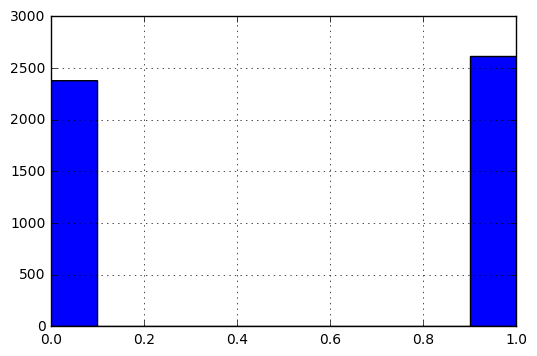

In [10]:
# 分析上述图形可以猜测，标准答案应该是0，1数量相等的，所以提高1的阈值
test_label_df = pd.read_csv('robert_wwm_large_epoch5_lr1_ml64_bs12_rule2_60.csv',sep='\t',encoding='utf-8',header=None)
test_label_df.head()
test_label_df[1].hist()

In [5]:
# 新的训练集
train_file = 'data/new_train_data.txt'
train_df = pd.read_csv(train_file, encoding='utf-8', header=0, sep='\t')  # 分隔符可能需要换
train_df.head()

,qid,label,question1,question2
0,2,0,哪些情形下，不予受理民事诉讼申请？,民事诉讼什么情况下不能立案
1,2,0,哪些情形下，不予受理民事诉讼申请？,哪些案件会给开具民事诉讼不予立案通知书
2,2,0,哪些情形下，不予受理民事诉讼申请？,法院对于哪些案件再审申请不予受理
3,2,0,民事诉讼中对哪些情形的起诉法院不予受理,民事诉讼什么情况下不能立案
4,2,0,民事诉讼中对哪些情形的起诉法院不予受理,哪些案件会给开具民事诉讼不予立案通知书


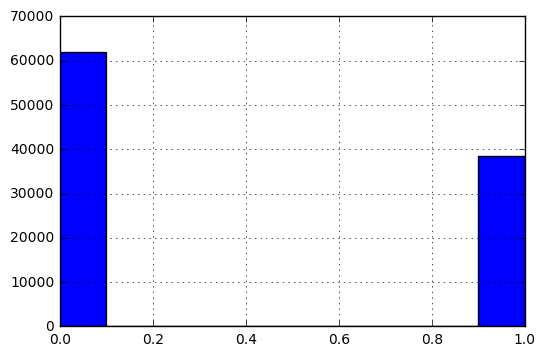

In [6]:
train_df['label'].hist()